In [1]:
#importing libraries 
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,Zero,yes,southwest,16884.92400
1,18,male,33.770,One,no,southeast,1725.55230
2,28,male,33.000,Three,no,southeast,4449.46200
3,33,male,22.705,Zero,no,northwest,21984.47061
4,32,male,28.880,Zero,no,northwest,3866.85520


#### 1. Data Understanding


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe(include="O")

,gender,children,smoker,region
count,1338,1338,1338,1338
unique,2,6,2,4
top,male,Zero,no,southeast
freq,676,574,1064,364


In [41]:
df["gender"].value_counts()

male      675
female    662
Name: gender, dtype: int64

#### 2. Data Cleaning
In this part of the EDA. We will check ;

Missing Values
Duplicated Values

In [6]:
#check missing data
df.isnull().any()

age         False
gender      False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

##### no exist missing values

In [7]:
df[df.duplicated()]

,age,gender,bmi,children,smoker,region,charges
581,19,male,30.59,Zero,no,northwest,1639.5631


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,Zero,yes,southwest,16884.92400
1,18,male,33.770,One,no,southeast,1725.55230
2,28,male,33.000,Three,no,southeast,4449.46200
3,33,male,22.705,Zero,no,northwest,21984.47061
4,32,male,28.880,Zero,no,northwest,3866.85520


#### 3. Data Visualization


<AxesSubplot:xlabel='charges', ylabel='Count'>

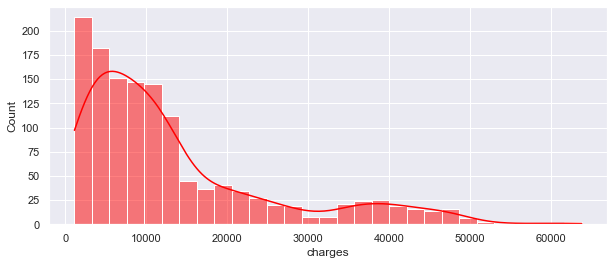

In [11]:
sns.set(rc={'figure.figsize':(10,4)})
sns.histplot(data=df["charges"],kde=True,color="red")

##### We see that our data looks like the right(positive) skewed. Most of the charges are between 0 – 10000 dollars.

<AxesSubplot:xlabel='age', ylabel='Count'>

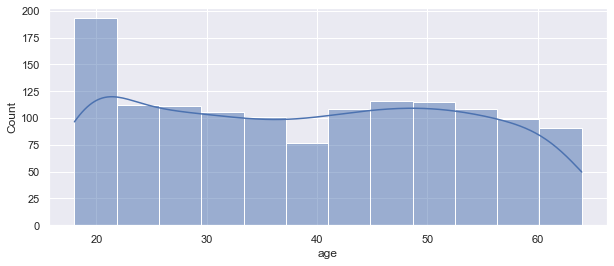

In [19]:
sns.histplot(data=df["age"],kde=True)

##### We see that most of the customers are 18–19 years old

<AxesSubplot:xlabel='charges'>

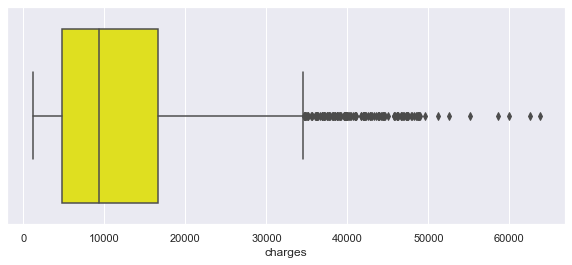

In [32]:
sns.boxplot(data=df,x=df["charges"],color="yellow")

<AxesSubplot:xlabel='gender', ylabel='count'>

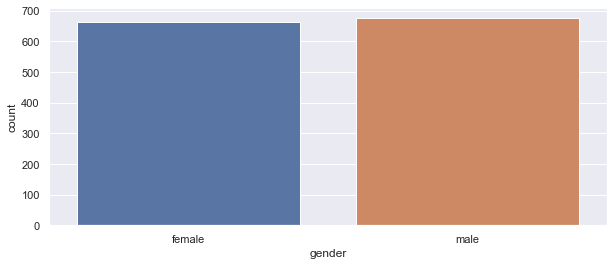

In [25]:
sns.countplot(x='gender', data=df)


##### Female and Male customers have almost the same number



<AxesSubplot:xlabel='children', ylabel='count'>

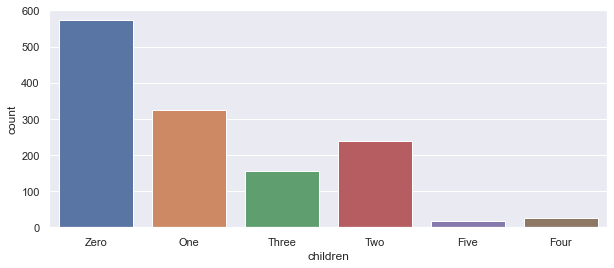

In [26]:
sns.countplot(data=df,x=df["children"])

##### The mostof the people do not have any children.



Text(0.5, 1.0, 'Smoker by Gender')

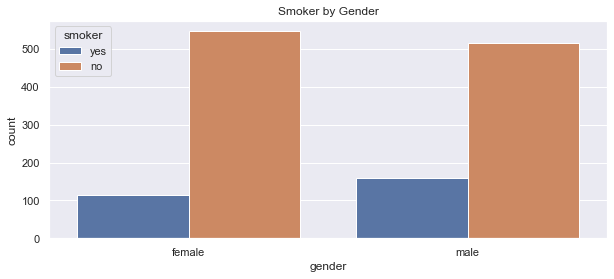

In [33]:
sns.countplot(data=df,x="gender",hue="smoker").set_title("Smoker by Gender")

##### most people dont smoke but female more a little not smoking

<AxesSubplot:xlabel='region', ylabel='count'>

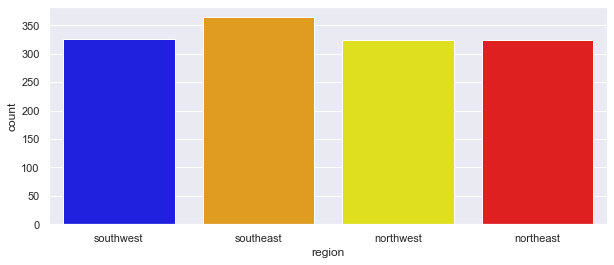

In [31]:
sns.countplot(data=df,x="region",palette=["blue","orange","yellow","red"])

##### All four regions are almost equally distributed. The number of people from the southeast is slightly more than others.

<AxesSubplot:xlabel='age', ylabel='charges'>

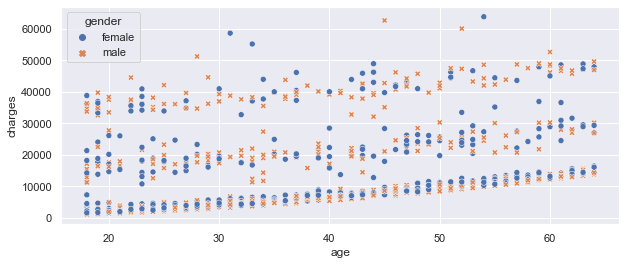

In [12]:
sns.scatterplot(data=df,x="age",y="charges",color="red",hue="gender",marker="*",style="gender")

##### We see that there is a weak positive relationship between age and charges

Text(0.5, 1.0, '')

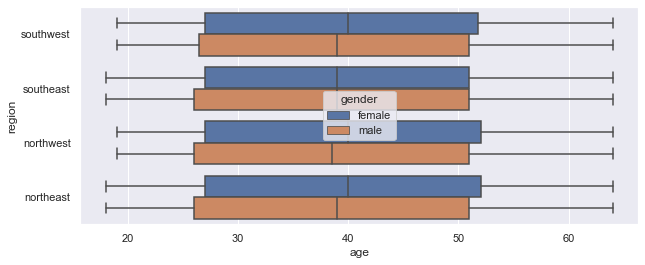

In [13]:
sns.boxplot(data=df,x="age",y="region",hue="gender")



<AxesSubplot:xlabel='smoker', ylabel='charges'>

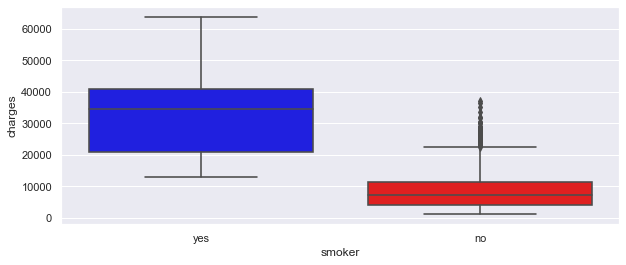

In [37]:

sns.boxplot(x='smoker',y='charges',data=df,palette=["blue","red"],linewidth=1.6)

##### The boxplot shows us the cost of insurance for smokers is higher than for non-smokers.



In [17]:
df.corr()

,age,bmi,charges
age,1.000000,0.109344,0.298308
bmi,0.109344,1.000000,0.198401
charges,0.298308,0.198401,1.000000


<AxesSubplot:>

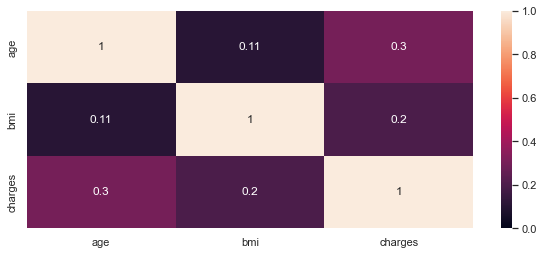

In [18]:
sns.heatmap(df.corr(),vmin=0,vmax=1,annot=True)

### thank you !